Accuracy: 0.9857142857142858

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99        52
           1       0.95      1.00      0.97        18

    accuracy                           0.99        70
   macro avg       0.97      0.99      0.98        70
weighted avg       0.99      0.99      0.99        70


Feature Importance:
                     Feature  Coefficient
4  Days Since Last Purchase     1.542758
2           Items Purchased     0.942112
0                       Age    -0.928467
3            Average Rating     0.040484
1               Total Spend    -0.027138


/tmp/ipython-input-3574843937.py:76: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=importance, palette="coolwarm")


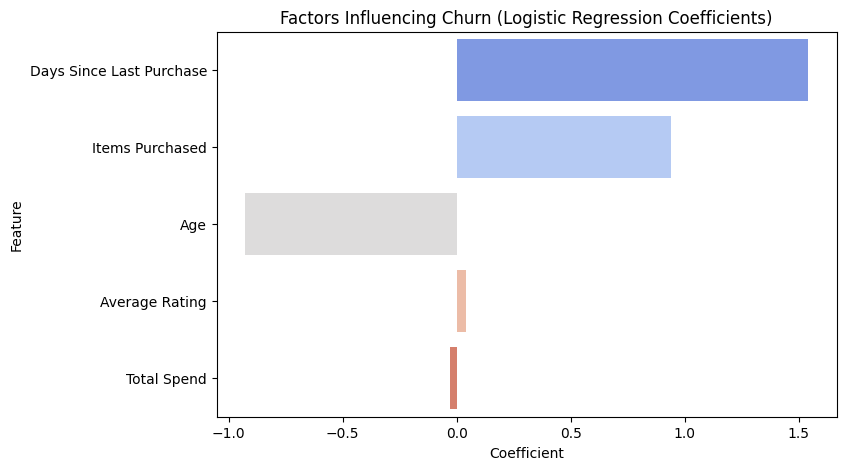


Sample Revenue Impact:
      Churn Probability Risk Level  Revenue Loss If Churn  \
157       1.122024e-14   Low Risk           9.098492e-12   
341       7.237567e-01  High Risk           8.255169e+02   
315       1.000000e+00  High Risk           7.104000e+02   
234       5.010867e-13   Low Risk           4.162778e-10   
155       2.301112e-06   Low Risk           9.913190e-04   

     Revenue Saved If Retained  
157                 810.900000  
341                 315.083089  
315                   0.000000  
234                 830.750000  
155                 430.799009  
 Churn predictions saved to churn_predictions.csv


In [ ]:
# Step 0: Import Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd

# Load dataset
df = pd.read_csv("ecommerce data.csv")

# Step 1: Create a synthetic "Churn" column
df['Churn'] = df.apply(
    lambda row: 1 if (row['Days Since Last Purchase'] > 40 or row['Satisfaction Level'] == "Unsatisfied") else 0,
    axis=1
)

# Step 2: Features and Target
y = df['Churn']
X = df[['Age', 'Total Spend', 'Items Purchased',
        'Average Rating', 'Days Since Last Purchase']]

# --- same Logistic Regression code continues here --

# Step 2: Target (y) and Features (X)
y = df['Churn']   # target column (0 = stay, 1 = churn)

# Select numeric features (you can add more if available)
X = df[['Age', 'Total Spend', 'Items Purchased',
        'Average Rating', 'Days Since Last Purchase']]

# Step 3: Split into Train/Test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Step 4: Train Logistic Regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Step 5: Predictions
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:,1]  # probability of churn

# Step 6: Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Step 7: Classify Risk Levels
risk = []
for p in y_pred_proba:
    if p > 0.7:
        risk.append("High Risk")
    elif p > 0.4:
        risk.append("Medium Risk")
    else:
        risk.append("Low Risk")

df_test = X_test.copy()
df_test['Actual Churn'] = y_test.values
df_test['Churn Probability'] = y_pred_proba
df_test['Risk Level'] = risk

# Step 8: Feature Importance
importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
}).sort_values(by='Coefficient', key=abs, ascending=False)

print("\nFeature Importance:\n", importance)

# Plot Feature Importance
plt.figure(figsize=(8,5))
sns.barplot(x='Coefficient', y='Feature', data=importance, palette="coolwarm")
plt.title("Factors Influencing Churn (Logistic Regression Coefficients)")
plt.show()

# Step 9: Revenue Loss & Saved Estimation
# Assume "Total Spend" is the revenue per customer
df_test['Revenue Loss If Churn'] = df_test['Churn Probability'] * df_test['Total Spend']
df_test['Revenue Saved If Retained'] = (1 - df_test['Churn Probability']) * df_test['Total Spend']

print("\nSample Revenue Impact:\n", df_test[['Churn Probability','Risk Level','Revenue Loss If Churn','Revenue Saved If Retained']].head())
# Save results for Power BI
df_test.to_csv("churn_predictions.csv", index=False)
print(" Churn predictions saved to churn_predictions.csv")



In [ ]:
from google.colab import drive
drive.mount('/content/drive')